# Table of Contents

Introduction

# Brief overview of the notebook's purpose and scope.
# Question-Answering with BERT

Loading and utilizing a pre-trained BERT model for question-answering tasks.
Moving the BERT model to the GPU if available.
Function to ask questions from the context using BERT and printing the answers.
Question-Answering with DistilBERT

Loading and utilizing a pre-trained DistilBERT model for question-answering tasks.
Moving the DistilBERT model to the GPU if available.
Function to ask questions from the context using DistilBERT and printing the answers.
Question-Answering with BART

Loading and utilizing a pre-trained BART model for question-answering tasks.
Moving the BART model to the GPU if available.
Function to ask questions from the context using BART and printing the answers.
Question-Answering with T5

Loading and utilizing a pre-trained T5 model for question-answering tasks.
Moving the T5 model to the GPU if available.
Function to ask questions from the context using T5 and printing the answers.
Conclusion

Summary of the notebook's key points and findings.

In [1]:
!pip install transformers
!pip install datsets transformers[sentencepiece]
!pip install sentencepiece

ERROR: Could not find a version that satisfies the requirement datsets (from versions: none)
ERROR: No matching distribution found for datsets


In [2]:
pip install PyMuPDF pandas

In [3]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf_document:
        num_pages = pdf_document.page_count
        for page_num in range(num_pages):
            page = pdf_document[page_num]
            if page != "":
                text += page.get_text()
    return text


pdf_textbook_path = '/content/drive/MyDrive/LLM Note for Inference (1).pdf'

context = extract_text_from_pdf(pdf_textbook_path)

In [4]:
import torch
import pandas as pd


# Example questions
questions = [
    "What is momentum?",
    "What is the nationality of Albert Einstein?",
    "What did Albert Einstein develop?",
    "What are the two pillars of modern physics?"
]

answers = [
    "The momentum of an object is defined as its mass multiplied by its velocity. Mathematically: p = mv",
    "Albert Einstein is from Germany",
    "He developed the theory of relativity",
    "the theory of relativity and the quantum theory",
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


import time
import matplotlib.pyplot as plt

# Lists to store model names and corresponding durations
model_names = []
durations = []

# Initialize an empty DataFrame with questions and correct answers
df = pd.DataFrame(columns=['question', 'answer', 'BERT_answer', 'DistilBERT_answer', 'BART_answer', 'T5T_answer'])


# BERT Model

In [5]:
from transformers import BertTokenizer, BertForQuestionAnswering
# from transformers import DistilBertForQuestionAnswering, DistilBertTokenizer

bert_ans = []
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


# Move the model to the GPU if available
model.to(device)


# Function to ask questions from the context using BERT on the GPU
def ask_question_bert(question, context, model, tokenizer, device):
    inputs = tokenizer.encode_plus(question, context, return_tensors='pt', max_length=512, truncation=True).to(device)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    outputs = model(input_ids, attention_mask=attention_mask)
    start_idx = torch.argmax(outputs.start_logits)
    end_idx = torch.argmax(outputs.end_logits)

    answer = tokenizer.decode(input_ids[0][start_idx:end_idx + 1])
    return answer

# Ask questions and print answers using BERT (on GPU if available)
for question in questions:
    answer = ask_question_bert(question, context, model, tokenizer, device)
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
    bert_ans.append(answer)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What is momentum?
Answer: its mass multiplied by its velocity

Question: What is the nationality of Albert Einstein?
Answer: german

Question: What did Albert Einstein develop?
Answer: theory of relativity

Question: What are the two pillars of modern physics?
Answer: theory of relativity



# DistilBERT MODEL

In [6]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering

distil_bert_ans = []

# Load pre-trained DistilBERT tokenizer and model for question-answering
tokenizer2 = DistilBertTokenizer.from_pretrained('distilbert-base-cased-distilled-squad')
model2 = DistilBertForQuestionAnswering.from_pretrained('distilbert-base-cased-distilled-squad')

# Move the model to the GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

# Function to ask questions from the context using DistilBERT on the GPU
def ask_question_distilbert(question, context, model, tokenizer, device):
    inputs = tokenizer.encode_plus(question, context, return_tensors='pt', max_length=512, truncation=True).to(device)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    outputs = model(input_ids, attention_mask=attention_mask)
    start_idx = torch.argmax(outputs.start_logits)
    end_idx = torch.argmax(outputs.end_logits)

    answer = tokenizer.decode(input_ids[0][start_idx:end_idx + 1])
    return answer

# Ask questions and print answers using DistilBERT (on GPU if available)
for question in questions:
    answer = ask_question_distilbert(question, context, model2, tokenizer2, device)
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
    distil_bert_ans.append(answer)

Question: What is momentum?
Answer: mass multiplied by its velocity

Question: What is the nationality of Albert Einstein?
Answer: German

Question: What did Albert Einstein develop?
Answer: theory of relativity

Question: What are the two pillars of modern physics?
Answer: theory of relativity



# BART MODEL

In [7]:
from transformers import BartTokenizer, BartForConditionalGeneration

# tokenizer3 = BartTokenizer.from_pretrained('facebook/bart-large')
# model3 = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
bart_ans = []
from transformers import BartTokenizer, BartForQuestionAnswering

# Load pre-trained BART tokenizer and model
tokenizer3 = BartTokenizer.from_pretrained('facebook/bart-large')
model3 = BartForConditionalGeneration.from_pretrained('facebook/bart-large')


# Move the model to the GPU if available
model3.to(device)

# Function to ask questions from the context using RoBERTa on the GPU
def ask_question_bart(question, context, model, tokenizer, device):
    # Tokenize input
    inputs_bart = tokenizer3.encode("question: " + question + " context: " + context, return_tensors='pt').to(device)

    # Generate the answer from the model
    output_bart = model3.generate(inputs_bart)

    # Decode the output to get the answer
    answer_bart = tokenizer3.decode(output_bart[0], skip_special_tokens=True)

    return answer_bart


# Ask questions and print answers using RoBERTa (on GPU if available)
for question in questions:
    answer = ask_question_bart(question, context, model3, tokenizer3, device)
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
    bart_ans.append(answer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Question: What is momentum?
Answer: What is Momentum?Definition: The momentum of an object is defined as its mass

Question: What is the nationality of Albert Einstein?
Answer: question: What is the nationality of Albert Einstein? context: Albert Einsteinluaj: What

Question: What did Albert Einstein develop?
Answer: question: What did Albert Einstein develop? context: Albert Einstein fixmeAlbert Einstein was a

Question: What are the two pillars of modern physics?
Answer: question: What are the two pillars of modern physics? context: Albert Einstein¯¯¯¯Albert



In [8]:
!pip install -U transformers
!pip install sentencepiece

In [9]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

t5t_ans = []

tokenizer4 = T5Tokenizer.from_pretrained('t5-small')
model4 = T5ForConditionalGeneration.from_pretrained('t5-small')

# Move the model to the GPU if available
model4.to(device)

# Fine-tuning code not shown (you would need labeled data for fine-tuning)

# Function to ask questions from the context using RoBERTa on the GPU
def ask_question_t5t(question, context, model, tokenizer, device):

    input_text = f"question: {question} context: {context}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)

    output_ids = model.generate(input_ids)
    answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return answer


# Ask questions and print answers using RoBERTa (on GPU if available)
for question in questions:
    answer = ask_question_t5t(question, context, model4, tokenizer4, device)
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
    t5t_ans.append(answer)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Question: What is momentum?
Answer: p = mv p

Question: What is the nationality of Albert Einstein?
Answer: German

Question: What did Albert Einstein develop?
Answer: theory of relativity

Question: What are the two pillars of modern physics?
Answer: theory of relativity



In [10]:
df['question'] = questions
df['answer'] = answers
df['BERT_answer'] = bert_ans
df['DistilBERT_answer'] = distil_bert_ans
df['BART_answer'] = bart_ans
df['T5T_answer'] = t5t_ans

df

,question,answer,BERT_answer,DistilBERT_answer,BART_answer,T5T_answer
0,What is momentum?,The momentum of an object is defined as its ma...,its mass multiplied by its velocity,mass multiplied by its velocity,What is Momentum?Definition: The momentum of a...,p = mv p
1,What is the nationality of Albert Einstein?,Albert Einstein is from Germany,german,German,question: What is the nationality of Albert Ei...,German
2,What did Albert Einstein develop?,He developed the theory of relativity,theory of relativity,theory of relativity,question: What did Albert Einstein develop? co...,theory of relativity
3,What are the two pillars of modern physics?,the theory of relativity and the quantum theory,theory of relativity,theory of relativity,question: What are the two pillars of modern p...,theory of relativity


# Analysis of Models

BLEU (Bilingual Evaluation Understudy) Score (for text generation tasks): BLEU score measures the similarity between the generated text and a reference text. Higher BLEU scores indicate better performance.

In [11]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Function to calculate BLEU score for a model's answer with smoothing
def calculate_bleu(reference, candidate):
    # Use smoothing function to handle zero counts
    smoothing_function = SmoothingFunction().method1
    return sentence_bleu([reference.split()], candidate.split(), smoothing_function=smoothing_function)

for index, row in df.iterrows():
    reference_answer = row['answer']

    # Calculate BLEU scores
    bleu_bert = calculate_bleu(reference_answer, row['BERT_answer'])
    bleu_distilbert = calculate_bleu(reference_answer, row['DistilBERT_answer'])
    bleu_bart = calculate_bleu(reference_answer, row['BART_answer'])
    bleu_t5t = calculate_bleu(reference_answer, row['T5T_answer'])

    # Add BLEU scores to the DataFrame
    df.at[index, 'BLEU_BERT'] = bleu_bert
    df.at[index, 'BLEU_DistilBERT'] = bleu_distilbert
    df.at[index, 'BLEU_BART'] = bleu_bart
    df.at[index, 'BLEU_T5T'] = bleu_t5t

# Print the updated DataFrame with BLEU scores
df

,question,answer,BERT_answer,DistilBERT_answer,BART_answer,T5T_answer,BLEU_BERT,BLEU_DistilBERT,BLEU_BART,BLEU_T5T
0,What is momentum?,The momentum of an object is defined as its ma...,its mass multiplied by its velocity,mass multiplied by its velocity,What is Momentum?Definition: The momentum of a...,p = mv p,0.102833,0.049670,0.501120,0.012008
1,What is the nationality of Albert Einstein?,Albert Einstein is from Germany,german,German,question: What is the nationality of Albert Ei...,German,0.000000,0.000000,0.020256,0.000000
2,What did Albert Einstein develop?,He developed the theory of relativity,theory of relativity,theory of relativity,question: What did Albert Einstein develop? co...,theory of relativity,0.206874,0.206874,0.000000,0.206874
3,What are the two pillars of modern physics?,the theory of relativity and the quantum theory,theory of relativity,theory of relativity,question: What are the two pillars of modern p...,theory of relativity,0.106213,0.106213,0.020256,0.106213


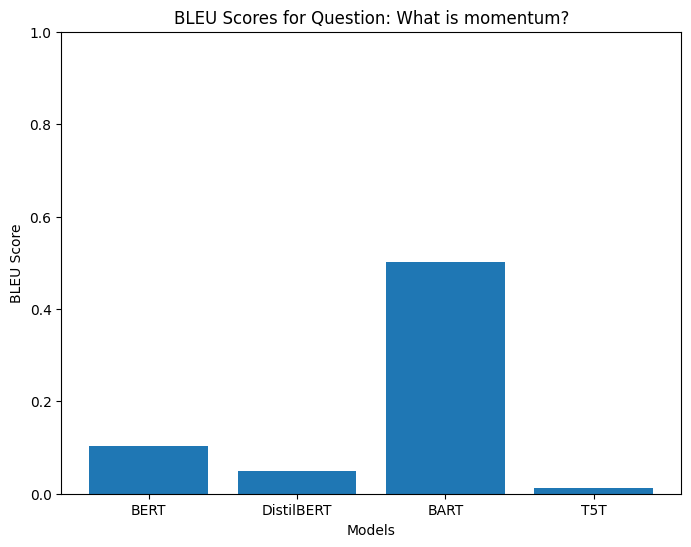

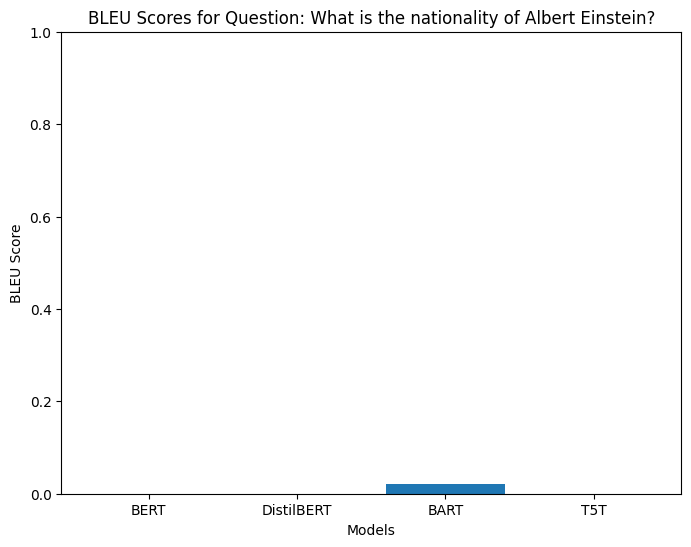

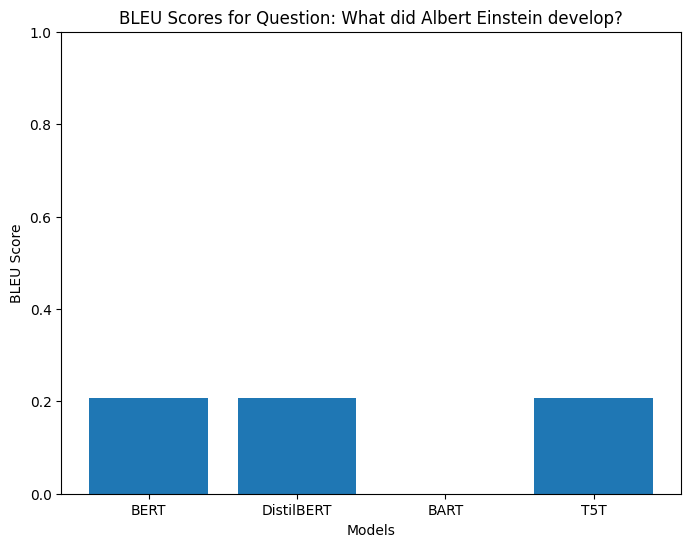

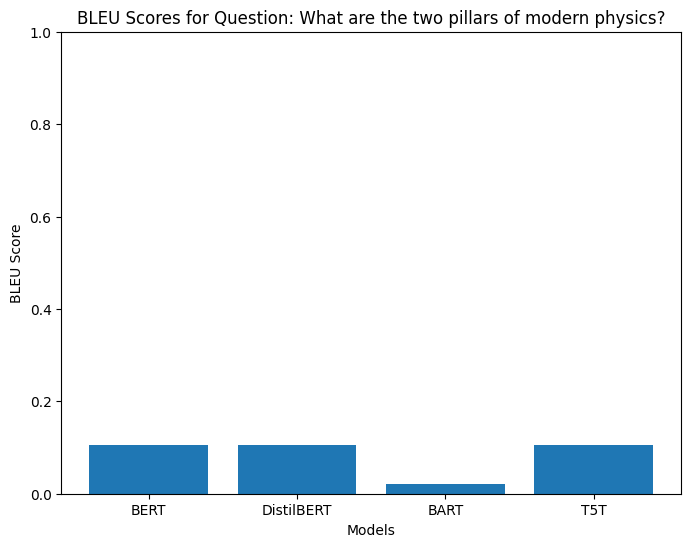

In [12]:
import matplotlib.pyplot as plt

# Plotting BLEU scores for each question and model
questions = df['question'].tolist()
models = ['BERT', 'DistilBERT', 'BART', 'T5T']
bleu_scores = df[['BLEU_BERT', 'BLEU_DistilBERT', 'BLEU_BART', 'BLEU_T5T']].values.T

# Create bar plots
for i, question in enumerate(questions):
    plt.figure(figsize=(8, 6))
    plt.bar(models, bleu_scores[:, i])
    plt.title(f'BLEU Scores for Question: {question}')
    plt.xlabel('Models')
    plt.ylabel('BLEU Score')
    plt.ylim(0, 1)  # Set y-axis limit to 1 for BLEU score range [0, 1]
    plt.show()

Exact Match (EM) Score (for question answering tasks):

In [15]:
pip install nltk

In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
from nltk.tokenize import word_tokenize

# Function to calculate Token Intersection over Union (Token IoU)
def calculate_token_iou(reference, candidate):
    reference_tokens = set(word_tokenize(reference.lower()))
    candidate_tokens = set(word_tokenize(candidate.lower()))

    intersection = len(reference_tokens.intersection(candidate_tokens))
    union = len(reference_tokens.union(candidate_tokens))

    if union == 0:
        return 0.0
    else:
        return intersection / union

# Calculate EM scores using Token Intersection over Union (Token IoU)
for index, row in df.iterrows():
    reference_answer = row['answer']

    # Calculate Token IoU scores
    iou_bert = calculate_token_iou(reference_answer, row['BERT_answer'])
    iou_distilbert = calculate_token_iou(reference_answer, row['DistilBERT_answer'])
    iou_bart = calculate_token_iou(reference_answer, row['BART_answer'])
    iou_t5t = calculate_token_iou(reference_answer, row['T5T_answer'])

    # Add Token IoU scores to the DataFrame
    df.at[index, 'IOU_BERT'] = iou_bert
    df.at[index, 'IOU_DistilBERT'] = iou_distilbert
    df.at[index, 'IOU_BART'] = iou_bart
    df.at[index, 'IOU_T5T'] = iou_t5t

# Print the updated DataFrame with Token IoU scores
df

,question,answer,BERT_answer,DistilBERT_answer,BART_answer,T5T_answer,BLEU_BERT,BLEU_DistilBERT,BLEU_BART,BLEU_T5T,IOU_BERT,IOU_DistilBERT,IOU_BART,IOU_T5T
0,What is momentum?,The momentum of an object is defined as its ma...,its mass multiplied by its velocity,mass multiplied by its velocity,What is Momentum?Definition: The momentum of a...,p = mv p,0.102833,0.049670,0.501120,0.012008,0.263158,0.263158,0.500000,0.157895
1,What is the nationality of Albert Einstein?,Albert Einstein is from Germany,german,German,question: What is the nationality of Albert Ei...,German,0.000000,0.000000,0.020256,0.000000,0.000000,0.000000,0.214286,0.000000
2,What did Albert Einstein develop?,He developed the theory of relativity,theory of relativity,theory of relativity,question: What did Albert Einstein develop? co...,theory of relativity,0.206874,0.206874,0.000000,0.206874,0.500000,0.500000,0.000000,0.500000
3,What are the two pillars of modern physics?,the theory of relativity and the quantum theory,theory of relativity,theory of relativity,question: What are the two pillars of modern p...,theory of relativity,0.106213,0.106213,0.020256,0.106213,0.500000,0.500000,0.111111,0.500000


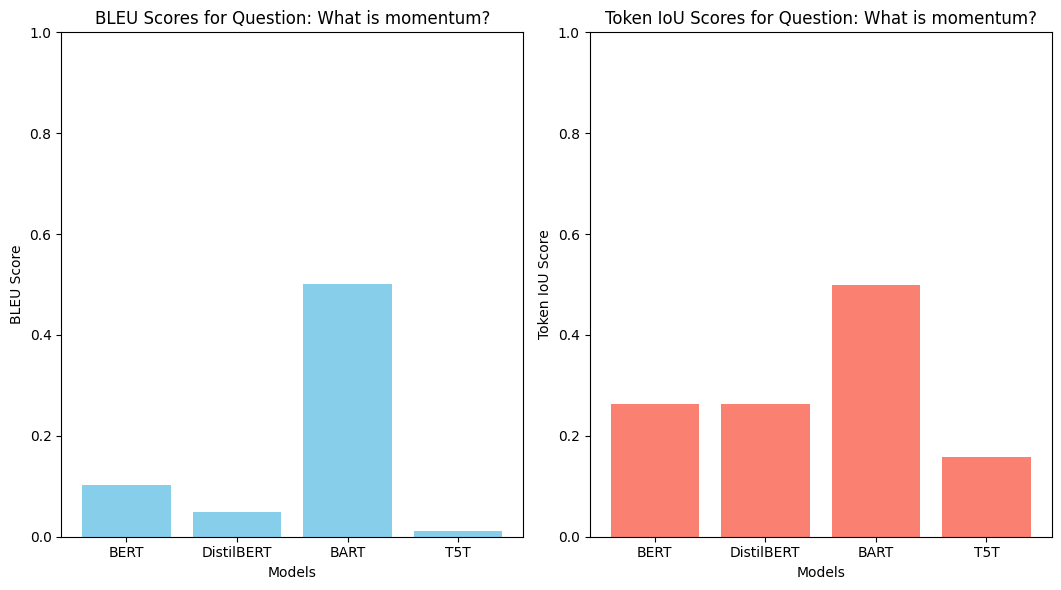

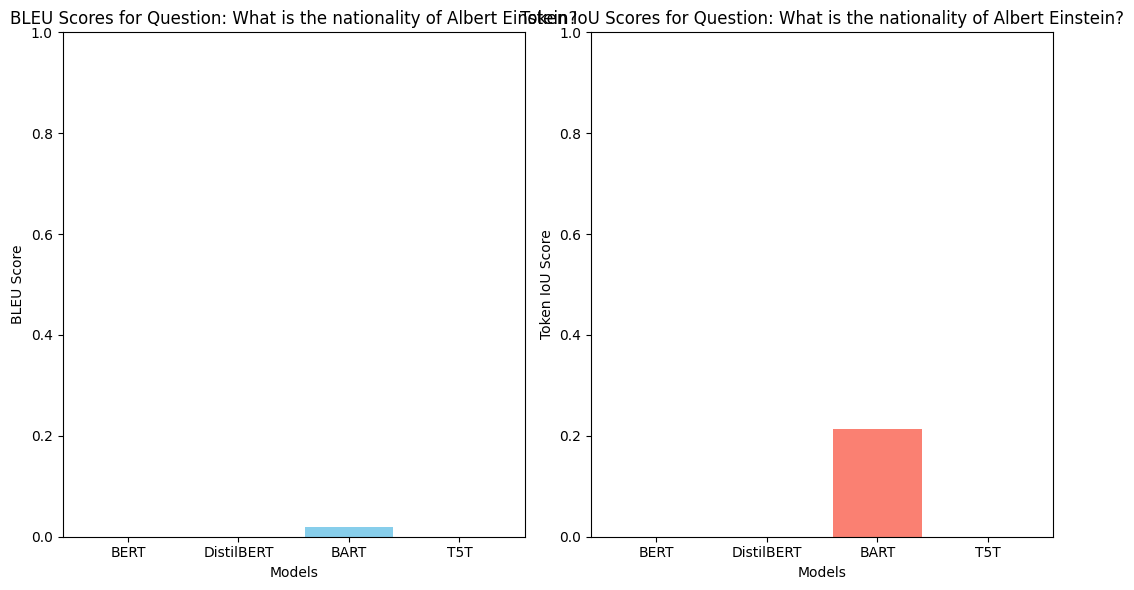

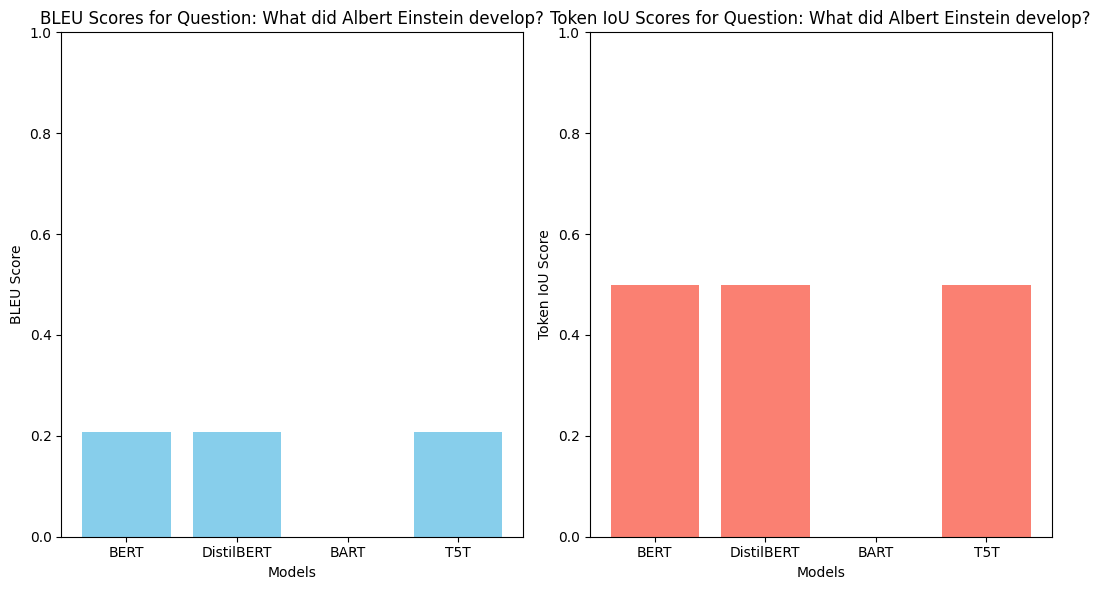

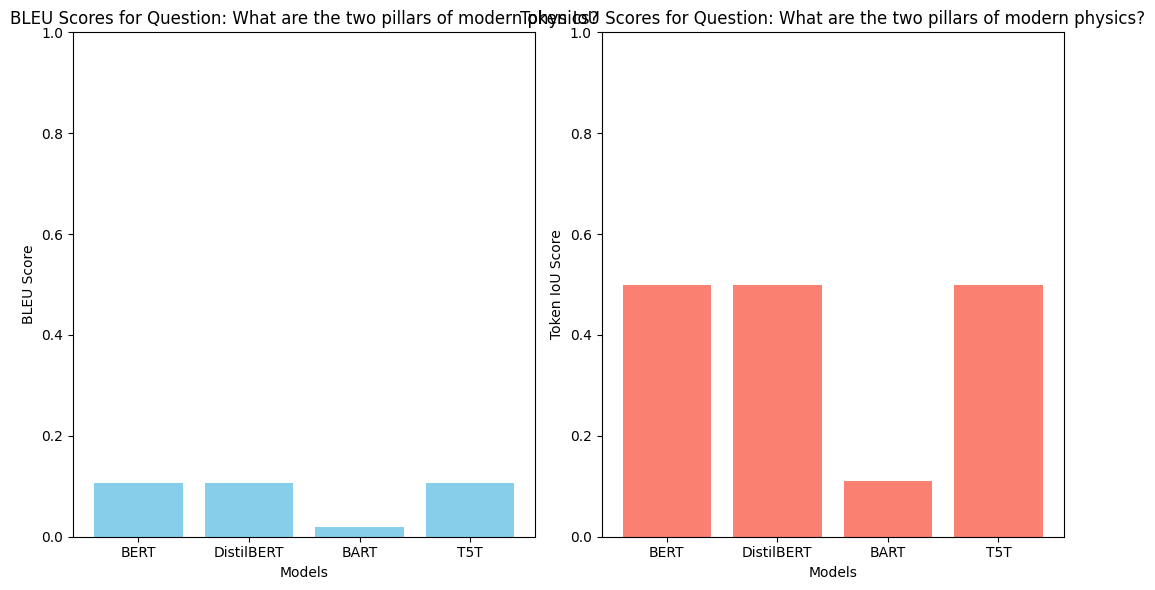

In [21]:
import matplotlib.pyplot as plt

# Plotting BLEU, EM, and Token IoU scores for each question and model
for i, question in enumerate(questions):
    plt.figure(figsize=(16, 6))

    # Plot BLEU scores
    plt.subplot(1, 3, 1)
    plt.bar(models, bleu_scores[:, i], color='skyblue')
    plt.title(f'BLEU Scores for Question: {question}')
    plt.xlabel('Models')
    plt.ylabel('BLEU Score')
    plt.ylim(0, 1)  # Set y-axis limit to 1 for BLEU score range [0, 1]

    # Plot Token IoU scores
    plt.subplot(1, 3, 2)
    iou_scores = df[['IOU_BERT', 'IOU_DistilBERT', 'IOU_BART', 'IOU_T5T']].values.T
    plt.bar(models, iou_scores[:, i], color='salmon')
    plt.title(f'Token IoU Scores for Question: {question}')
    plt.xlabel('Models')
    plt.ylabel('Token IoU Score')
    plt.ylim(0, 1)  # Set y-axis limit to 1 for Token IoU score range [0, 1]

    plt.tight_layout()
    plt.show()